# UCL ⚽ 2021-22 ⭐ Players Data | Champions League

### Context
This dataset contains all the player stats of UEFA Champions League season 2021-22 .

### Challenges
- Discover the weak points of any team.
- Suggest players need to be sold, based on performance analysis.
- Nominate Player of the season

### About UEFA Champions League
The UEFA Champions League is an annual club football competition organised by the Union of European Football Associations and contested by top-division European clubs, deciding the competition winners through a round robin group stage to qualify for a double-legged knockout format, and a single leg final.

### Content
- attacking.csv
- attempts.csv
- defending.csv
- disciplinary.csv
- distributon.csv
- goalkeeping.csv
- key_stats.csv

In [16]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import squarify
from sklearn import manifold

In [18]:
ks = pd.read_csv('key_stats.csv')
gl = pd.read_csv('goals.csv')
dfn = pd.read_csv('defending.csv')
atkg = pd.read_csv('attacking.csv')
gk = pd.read_csv('goalkeeping.csv')
dsp = pd.read_csv('disciplinary.csv')
atm = pd.read_csv('attempts.csv')
dis = pd.read_csv('distribution.csv')

In [19]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [20]:
gl.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [21]:
dfn.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [22]:
atkg.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [23]:
gk.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [24]:
dsp.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [25]:
atm.head()

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [26]:
dis.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


Text(0.5, 1.0, 'Total goals scored')

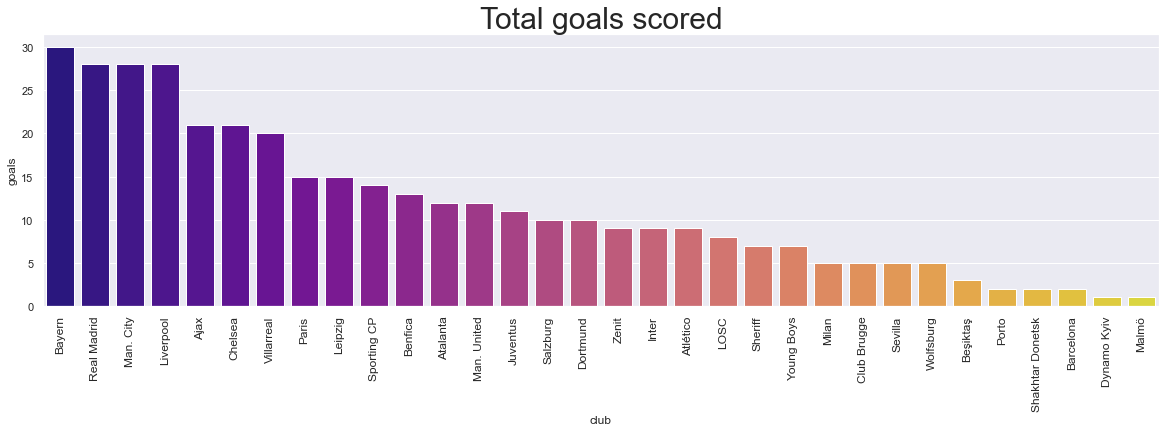

In [27]:
tks = ks.groupby('club', as_index=False)["goals"].sum().sort_values(by='goals', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12, rotation='vertical')
p = sns.barplot(x='club', y='goals', data=tks, palette='plasma', capsize=.2)
p.axes.set_title('Total goals scored', fontsize=30)

In [28]:
fig = px.treemap(tks, path=['club'], values='goals', width=1200, height=400, 
                 title='Title goals scored per club')
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

c:\Users\piai\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Average playting time per player per club')

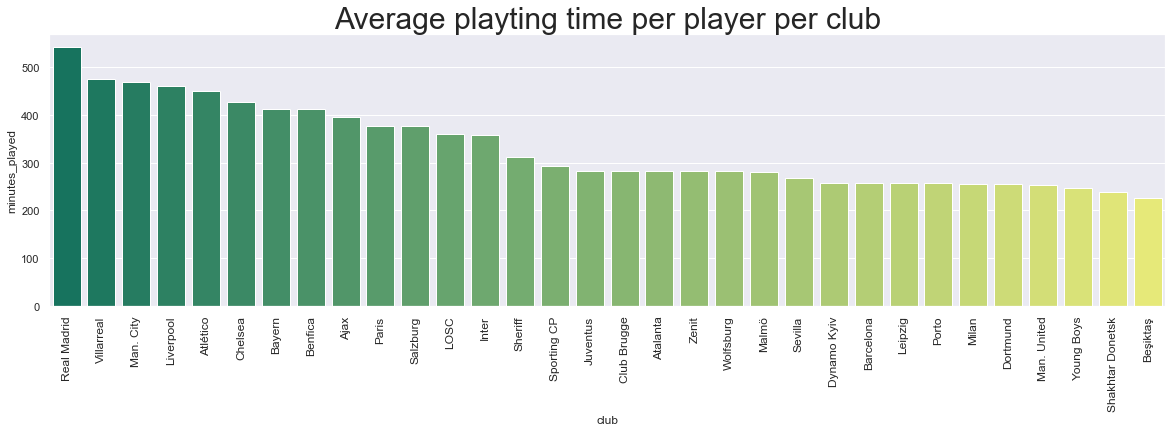

In [29]:
tks = ks.groupby('club', as_index=False)['minutes_played'].mean().sort_values(by='minutes_played', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12, rotation='vertical')
p = sns.barplot(x='club', y='minutes_played', data=tks, palette='summer', capsize=.2)
p.axes.set_title('Average playting time per player per club', fontsize=30)

Text(0.5, 1.0, 'Top 10 scores')

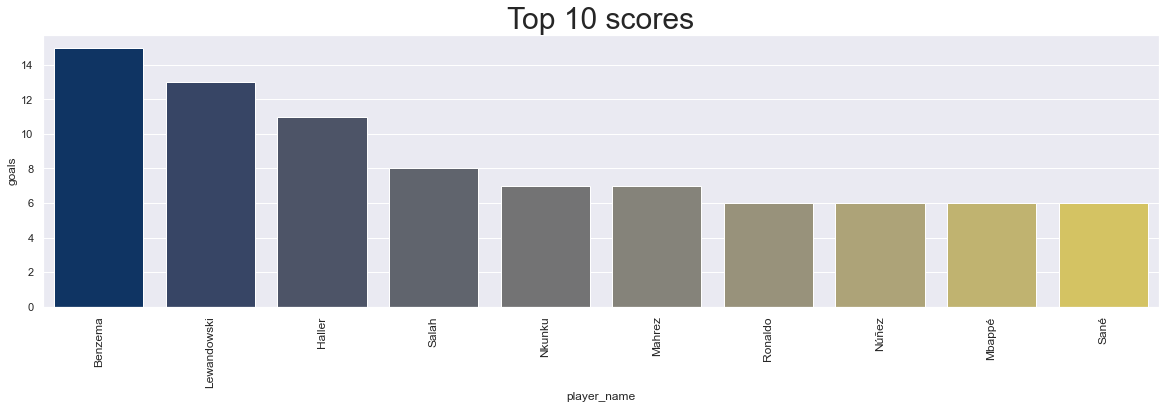

In [30]:
ks = ks.sort_values(by='goals', ascending=False)
tks = ks[:10]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12, rotation='vertical')
p = sns.barplot(x='player_name', y='goals', data=tks, palette='cividis', capsize=2)
p.axes.set_title('Top 10 scores', fontsize=30)

c:\Users\piai\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\piai\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



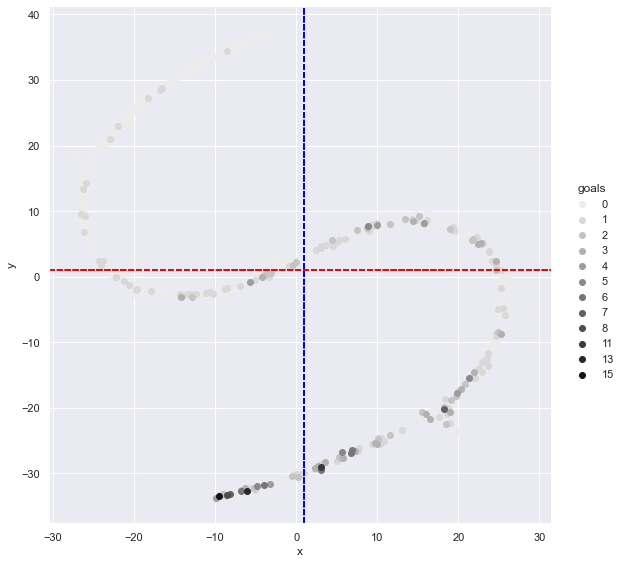

In [33]:
ks = ks.replace(to_replace='-', value=0)

tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(ks[['minutes_played', 'match_played', 'distance_covered']])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, ks['goals'])), columns=['x', 'y', 'goals'])
tsne_df.loc[:, 'goals'] = tsne_df.goals.astype(int)

sns.set(rc={'figure.figsize' : (15,10)})
grid = sns.FacetGrid(tsne_df, hue='goals', size=8, palette='binary')
grid.map(plt.scatter, 'x', 'y').add_legend()
grid.refline(x=tsne_df['goals'].quantile(0.9), color='blue')
grid.refline(y=tsne_df['goals'].quantile(0.9), color='red')

Text(0.5, 1.0, 'Top 15 teams in terms of goals')

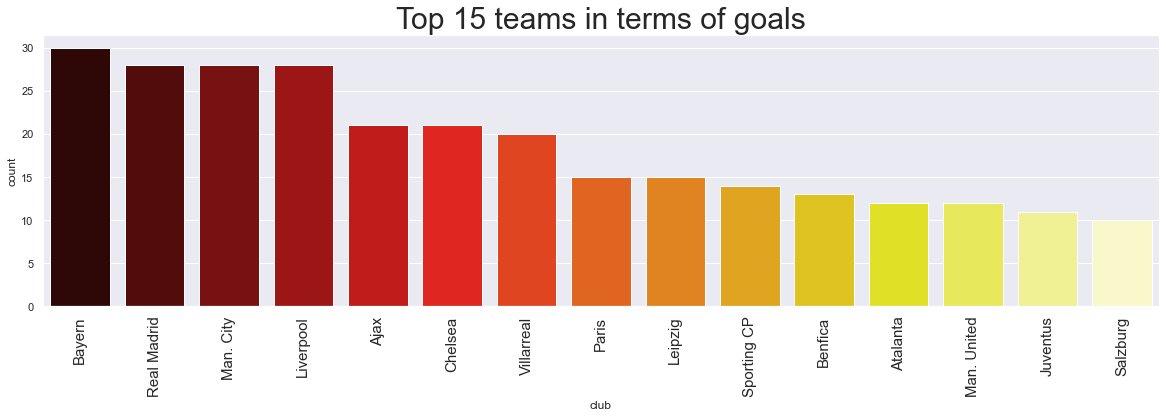

In [34]:
g1 = ks.groupby('club')['goals'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
g1 = g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='hot', capsize=2)
p.axes.set_title('Top 15 teams in terms of goals', fontsize=30)

In [35]:
gl_sum = pd.DataFrame(gl.sum(numeric_only=True),).T[['right_foot', 'left_foot', 'headers', 'others']]
gl_sum = gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, 
             title='Goal types analysis (how scored)', color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

In [38]:
gl_sum = pd.DataFrame(gl.sum(numeric_only=True),).T[['inside_area', 'outside_areas', 'penalties']]
gl_sum = gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, 
             title='Goal types analysis (from where scored)', color_discrete_sequence = px.colors.sequential.Rainbow)
fig.show()

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per playing position')

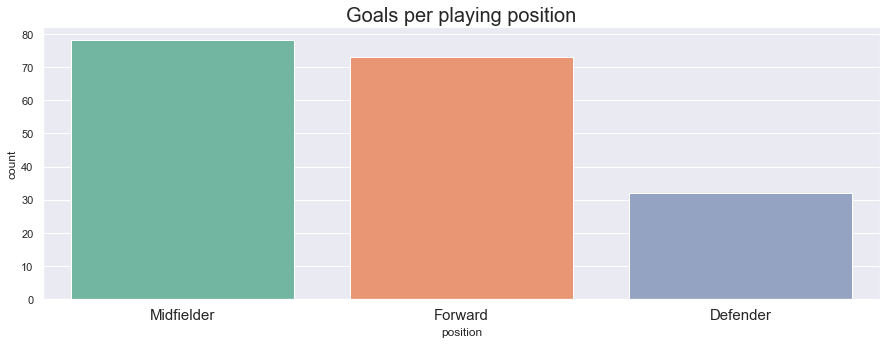

In [40]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p = sns.countplot(gl['position'], hue_order=gl.groupby('position'), 
                  order=gl.position.value_counts().sort_values(ascending=False).index, palette='Set2')
p.axes.set_title('Goals per playing position', fontsize=20)

Text(0.5, 1.0, 'Top 15 dribblers')

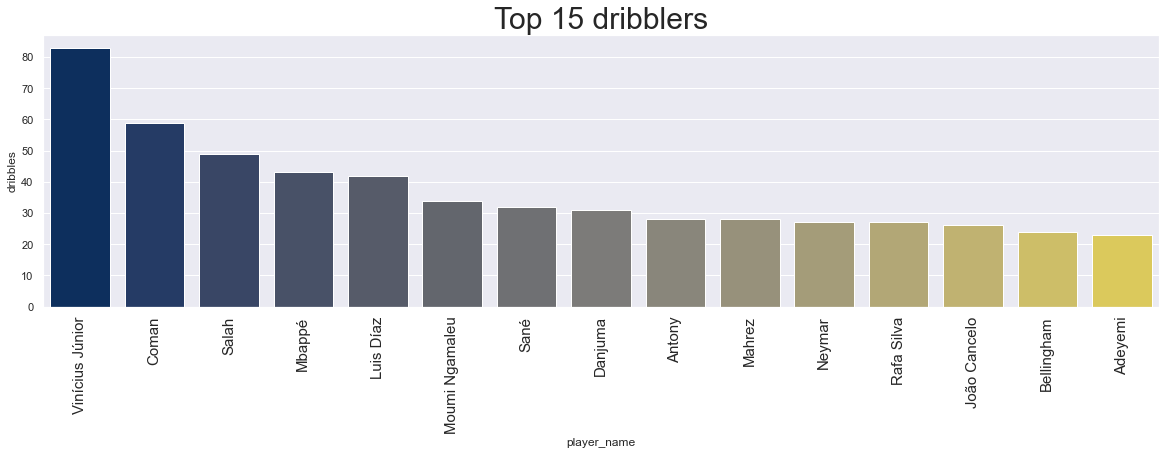

In [41]:
atkg = atkg.sort_values(by='dribbles', ascending=False)
t = atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='player_name', y='dribbles', data=t, palette='cividis', capsize=2)
p.axes.set_title('Top 15 dribblers', fontsize=30)

Text(0.5, 1.0, 'Top 15 teams in terms of dribbles')

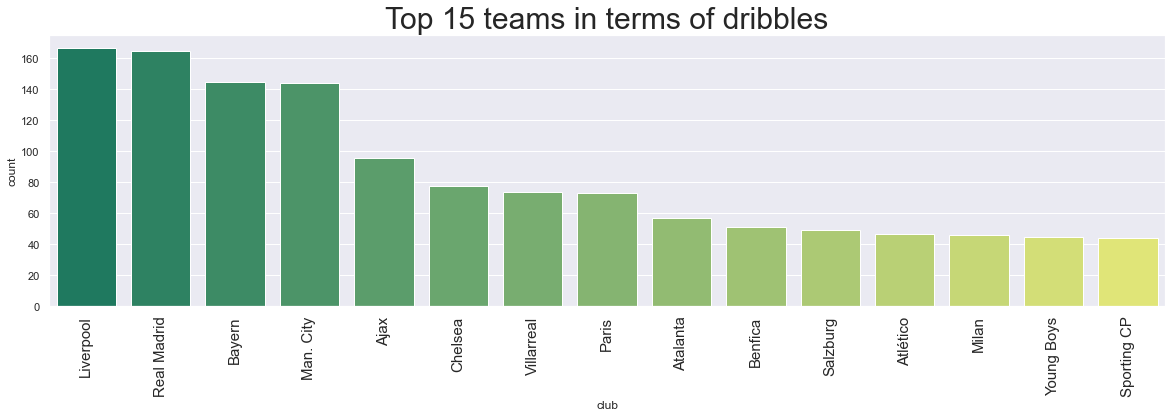

In [44]:
g1 = atkg.groupby('club')['dribbles'].agg('sum').reset_index(name = 'count').sort_values('count', ascending=False)
g1= g1[:15]
sns.set(rc={'figure.figsize':(20, 5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='summer', capsize=2)
p.axes.set_title('Top 15 teams in terms of dribbles', fontsize=30)

Text(0.5, 1.0, 'Top 15 corner takers')

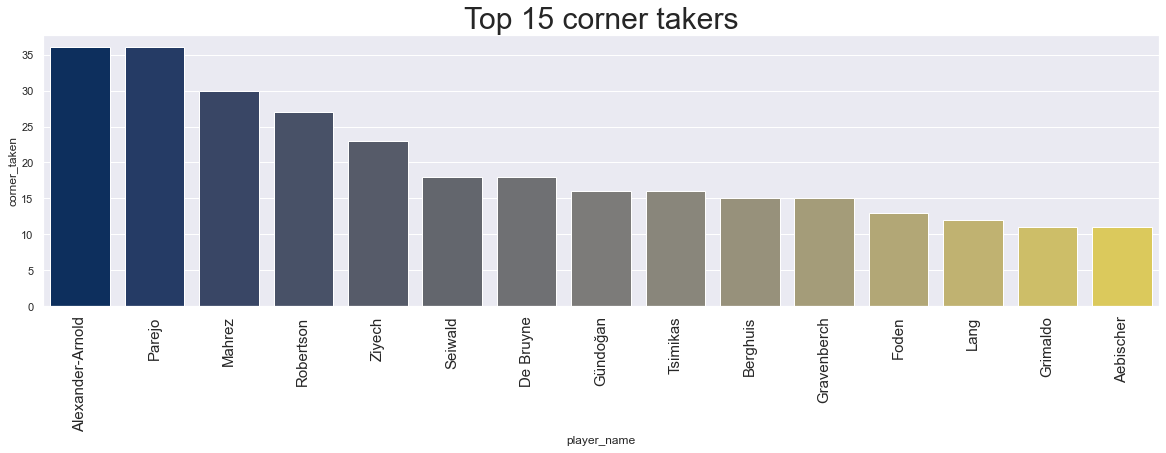

In [45]:
atkg = atkg.sort_values(by='corner_taken', ascending=False)
t = atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='player_name', y='corner_taken', data=t, palette='cividis', capsize=2)
p.axes.set_title('Top 15 corner takers', fontsize=30)

In [47]:
g1 = dfn.groupby('position')['balls_recoverd'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(10,10)})
fig = px.pie(g1, values='count', names=g1.position, title='Ball recovery analysis')
fig.show()

In [48]:
gl_sum = pd.DataFrame(dfn.sum(numeric_only=True),).T[['t_won', 't_lost']]
gl_sum = gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Tackle won vs lost',
             color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

Text(0.5, 1.0, 'Teams by clearance attmepted')

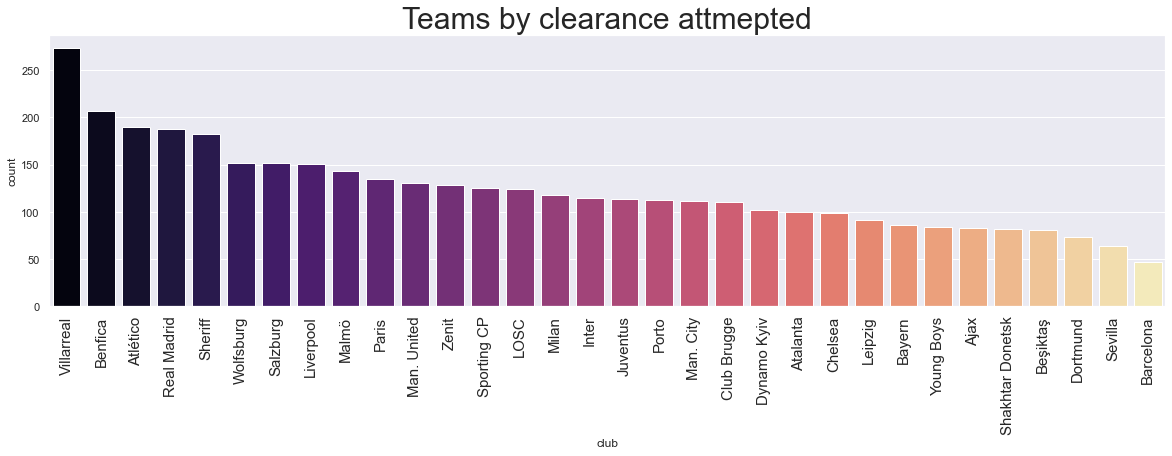

In [49]:
g1 = dfn.groupby('club')['clearance_attempted'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='magma', capsize=2)
p.axes.set_title('Teams by clearance attmepted', fontsize=30)

Text(0.5, 1.0, 'Club with successful tackles')

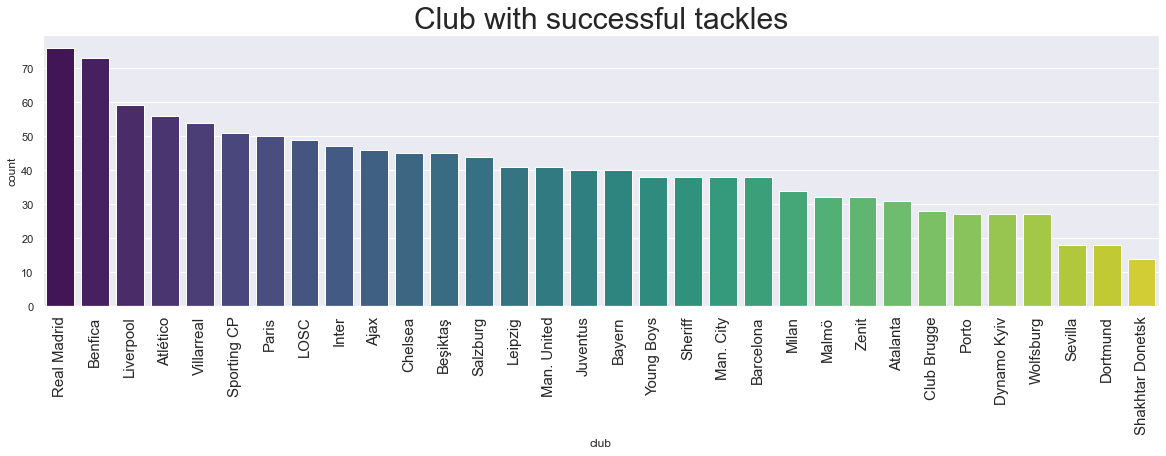

In [50]:
g1 = dfn.groupby('club')['t_won'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='viridis', capsize=2)
p.axes.set_title('Club with successful tackles', fontsize=30)

Text(0.5, 1.0, 'Top 15 defender by ranking')

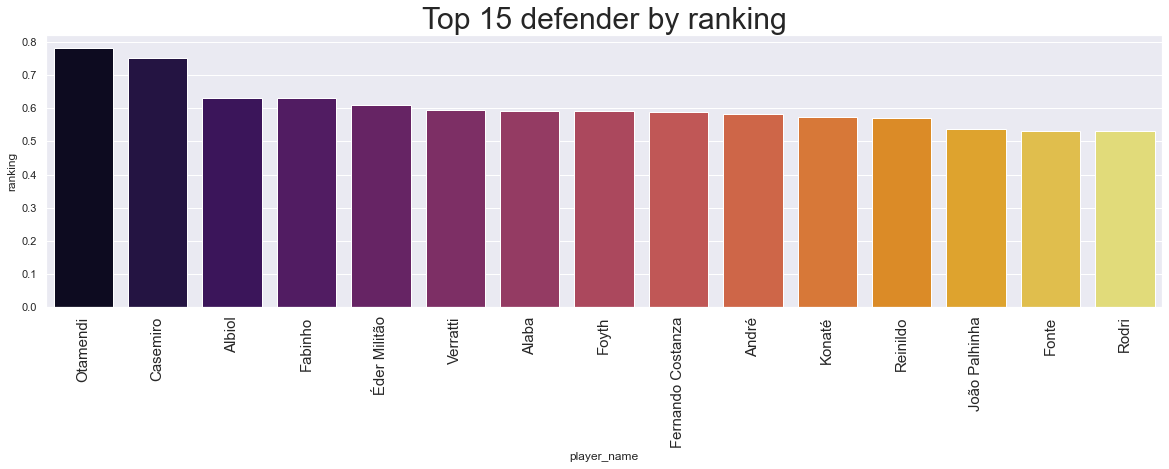

In [51]:
dfn['ranking'] = (dfn['balls_recoverd']/dfn['balls_recoverd'].max())*0.3 \
    + (dfn['tackles']/dfn['tackles'].max())*0.3 \
        +(dfn['t_won']/dfn['tackles'])*0.2 \
            +(dfn['t_won']/dfn['t_won'].max())*0.1 \
                +(dfn['clearance_attempted']/dfn['clearance_attempted'].max())*0.1
                
dfnx = dfn.sort_values('ranking', ascending=False)
dfnx = dfnx[:15]
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='player_name', y='ranking', data=dfnx, palette='inferno', capsize=2)
p.axes.set_title('Top 15 defender by ranking', fontsize=30)

In [52]:
gl_sum = pd.DataFrame(atm.sum(numeric_only=True),).T[['on_target', 'off_target', 'blocked']]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Attacking attempts analysis - success rate : on target vs off target vs blocked',
             color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

Text(0.5, 1.0, 'Club ranking by total attacking attempts')

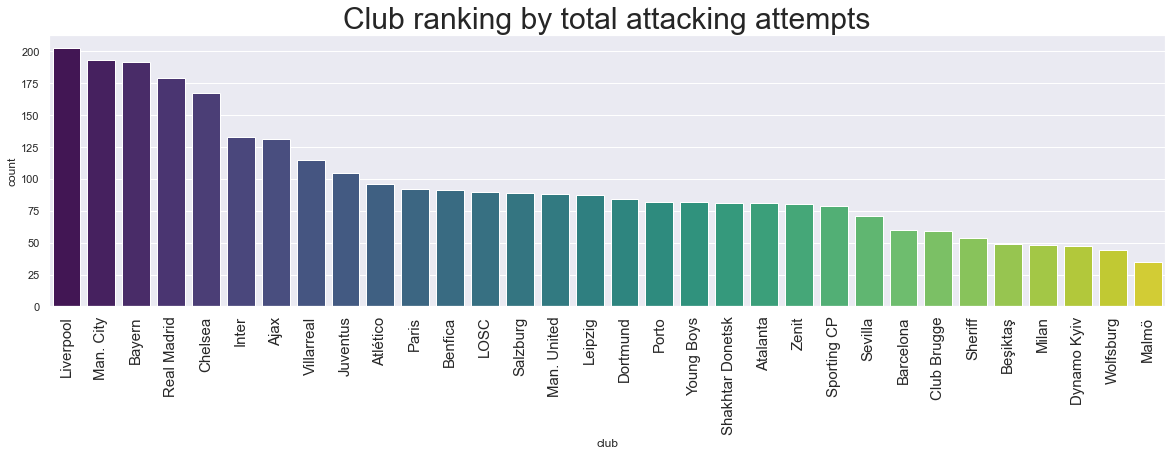

In [53]:
g1 = atm.groupby('club')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='viridis', capsize=2)
p.axes.set_title('Club ranking by total attacking attempts', fontsize=30)

Text(0.5, 1.0, 'Player playing position by total attacking attempts')

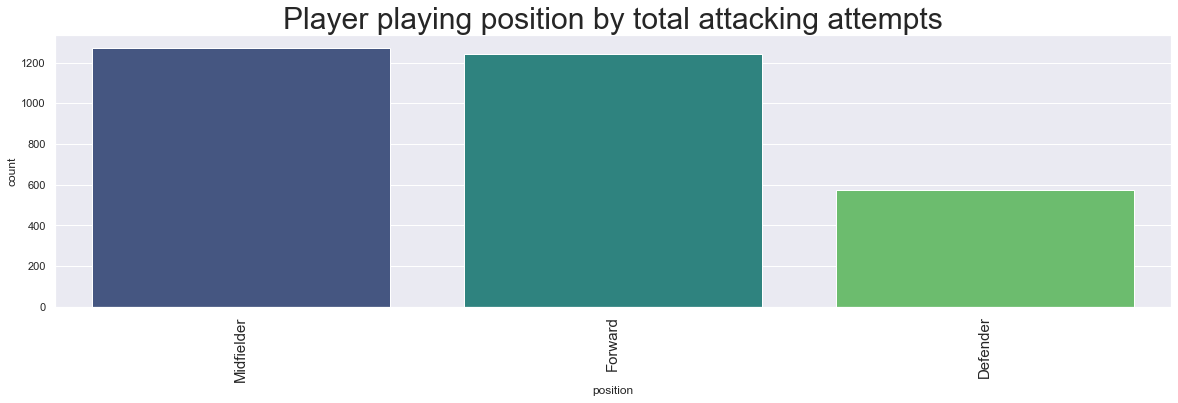

In [55]:
g1 = atm.groupby('position')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='position', y='count', data=g1, palette='viridis', capsize=2)
p.axes.set_title('Player playing position by total attacking attempts', fontsize=30)

Text(0.5, 1.0, 'Top 20 attacker by ranking on attacking attmeps')

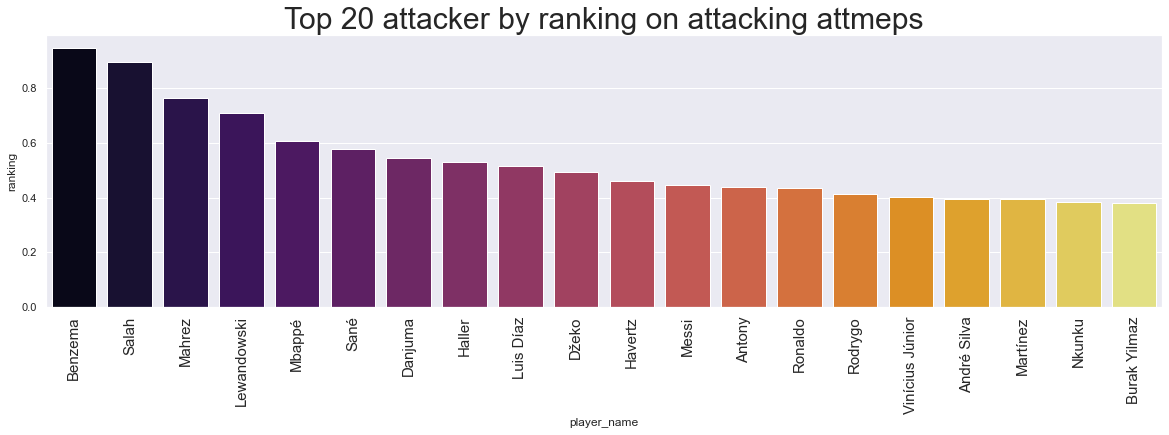

In [56]:
atm['ranking'] = (atm['total_attempts']/atm['total_attempts'].max())*0.5 \
    +(atm['on_target']/atm['on_target'].max())*0.3 \
        +(atm['on_target']/atm['total_attempts'].max())*0.4 \
            -(atm['off_target']/atm['total_attempts'])*0.2
            
dfnx = atm.sort_values('ranking', ascending=False)
dfnx = dfnx[:20]
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='player_name', y='ranking', data=dfnx, palette='inferno', capsize=2)
p.axes.set_title('Top 20 attacker by ranking on attacking attmeps', fontsize=30)

In [57]:
gl_sum = pd.DataFrame(gk.sum(numeric_only=True),).T[['saved','conceded']]
gl_sum = gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Overall Goal Keeping Performance',
             color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

Text(0.5, 1.0, 'Club ranking by Goal Keeping saves')

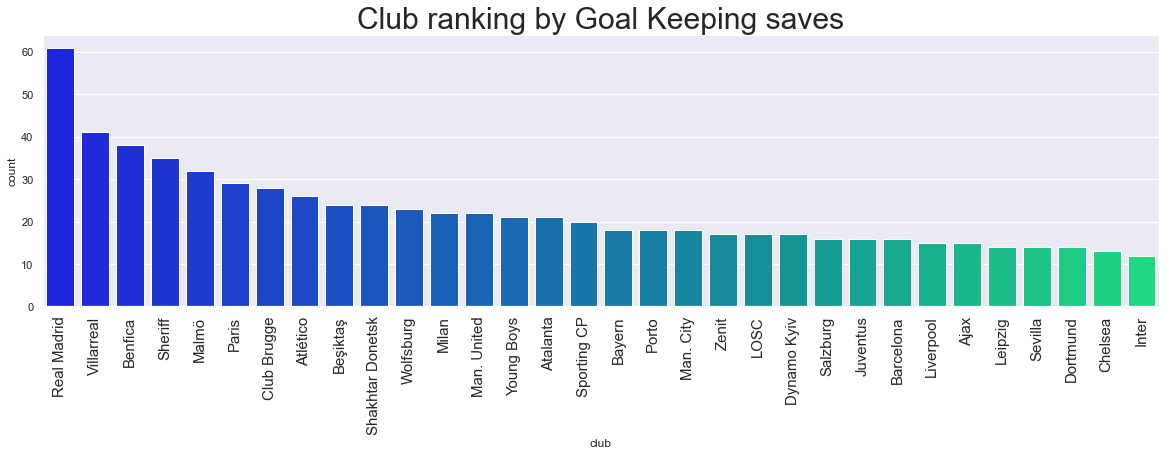

In [58]:
g1 = gk.groupby('club')['saved'].agg('sum').reset_index(name='count').sort_values('count', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15, rotation='vertical')
p = sns.barplot(x='club', y='count', data=g1, palette='winter', capsize=2)
p.axes.set_title('Club ranking by Goal Keeping saves', fontsize=30)

Text(0.5, 1.0, '\n Club ranking by Cleansheets\n')

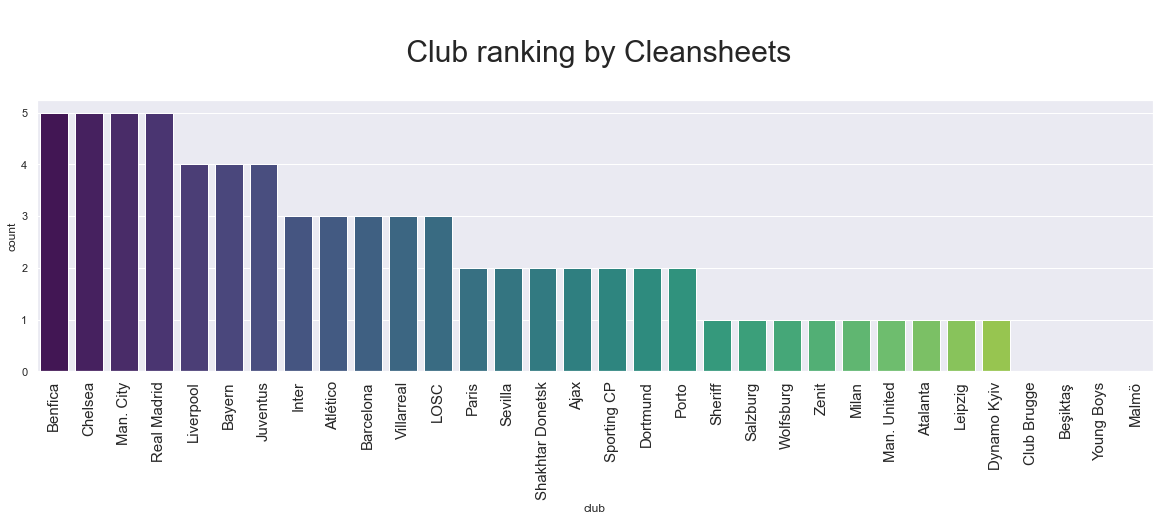

In [59]:
g1=gk.groupby('club')['cleansheets'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by Cleansheets\n",fontsize=30)

Text(0.5, 1.0, '\n Top 15 GK by ranking points \n')

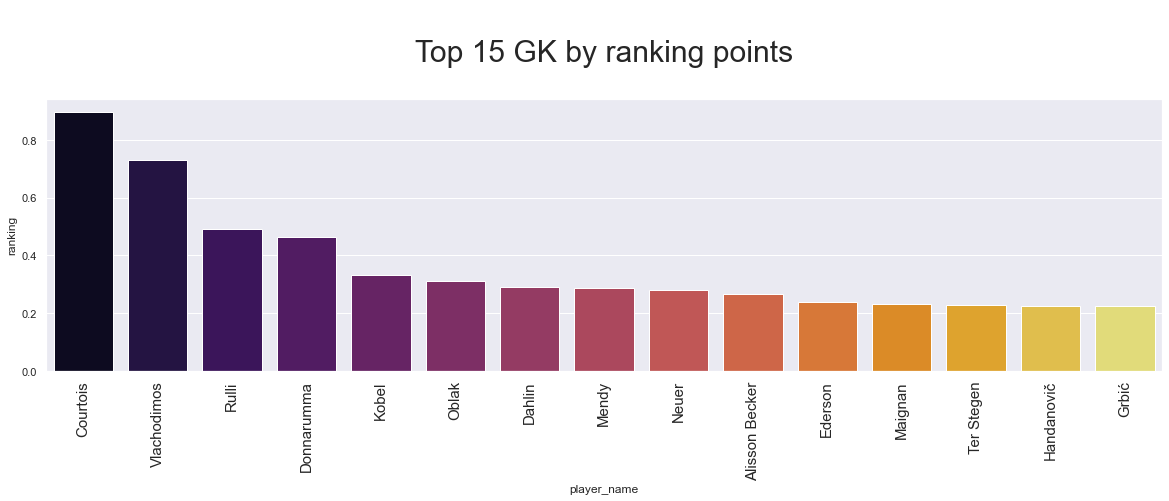

In [60]:
gk['ranking']=(gk['saved']/gk['saved'].max())*0.4 \
    -(gk['conceded']/(gk['conceded']+gk['saved']))*0.2 \
        +(gk['saved_penalties']/gk['saved_penalties'].max())*0.2 \
            +(gk['cleansheets']/gk['cleansheets'].max())*0.3 \
                +(gk['punches made']/gk['punches made'].max())*0.1
    
    
dfnx=gk.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 GK by ranking points \n",fontsize=30)

Text(0.5, 1.0, '\n Top 20 Players in terms of Ball Distribution \n')

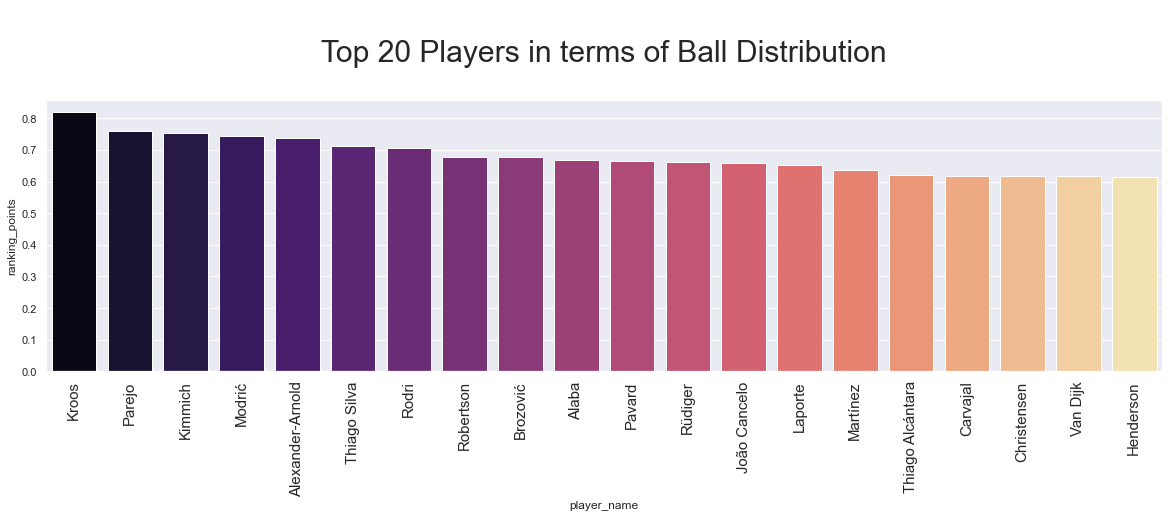

In [61]:
dis['ranking_points']=(dis['pass_attempted']/dis['pass_attempted'].max())*0.2 \
    +(dis['pass_completed']/dis['pass_completed'].max())*0.2 \
        +(dis['pass_accuracy']/100)*0.3 \
            +(dis['cross_attempted']/dis['cross_attempted'].max())*0.1 \
                +(dis['freekicks_taken']/dis['freekicks_taken'].max())*0.1 \
                    +(dis['cross_accuracy']/100)*0.1 
    
dfnx=dis.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="magma",capsize=2)
p.axes.set_title("\n Top 20 Players in terms of Ball Distribution \n",fontsize=30)

In [62]:
g1=dis.groupby('club')["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"].agg('sum').reset_index()

C:\Users\piai\AppData\Local\Temp\ipykernel_5420\3004790004.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, '\n Club ranking by Passes Attempted\n')

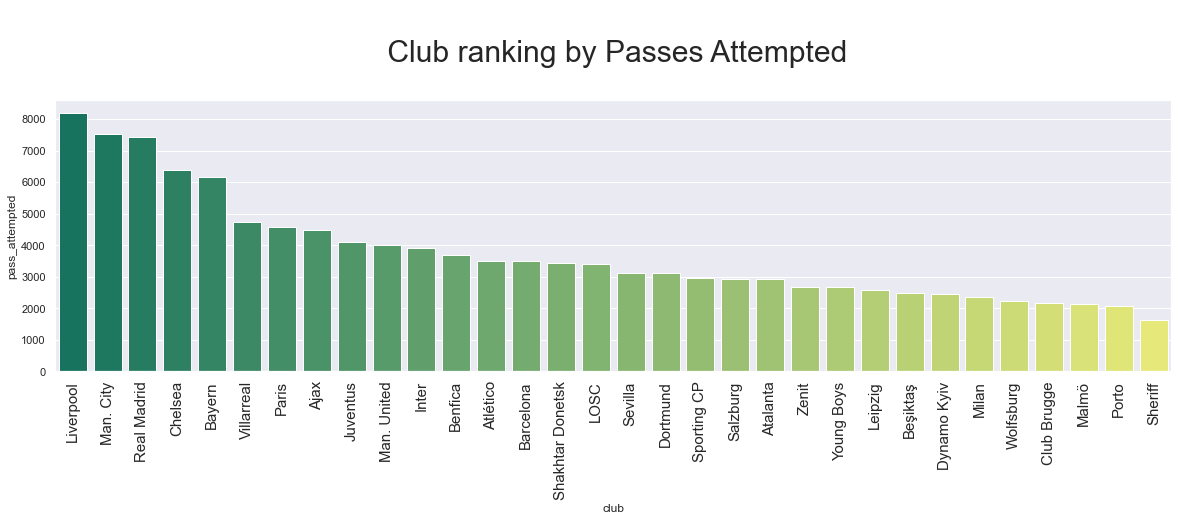

In [63]:
g1=g1.sort_values('pass_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="pass_attempted", data=g1,palette="summer",capsize=2)
p.axes.set_title("\n Club ranking by Passes Attempted\n",fontsize=30)

Text(0.5, 1.0, '\n Club ranking by Free Kicks Taken\n')

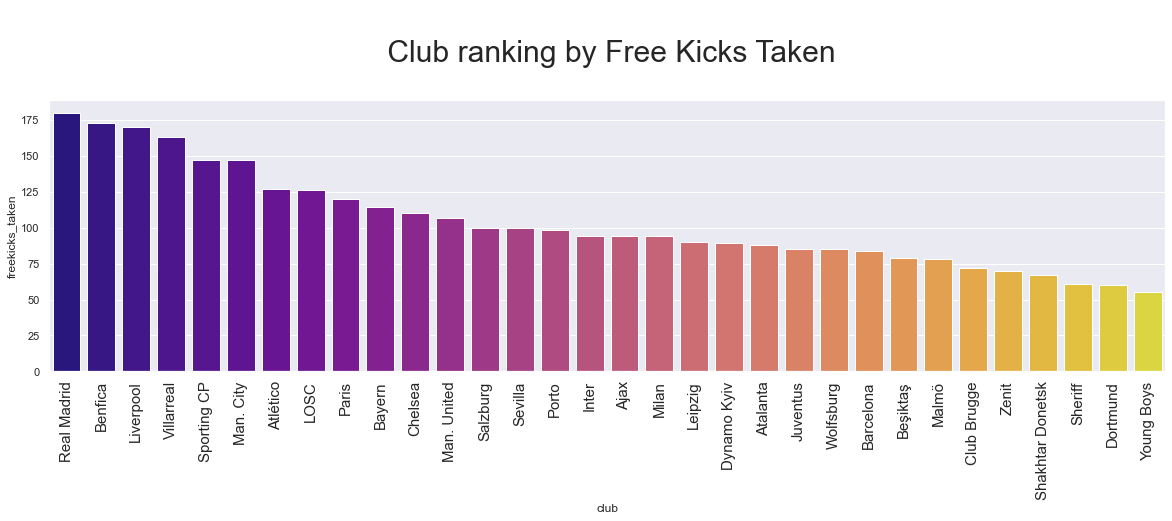

In [64]:
g1=g1.sort_values('freekicks_taken',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="freekicks_taken", data=g1,palette="plasma",capsize=2)
p.axes.set_title("\n Club ranking by Free Kicks Taken\n",fontsize=30)

Text(0.5, 1.0, '\n Club ranking by Crosses Attempted\n')

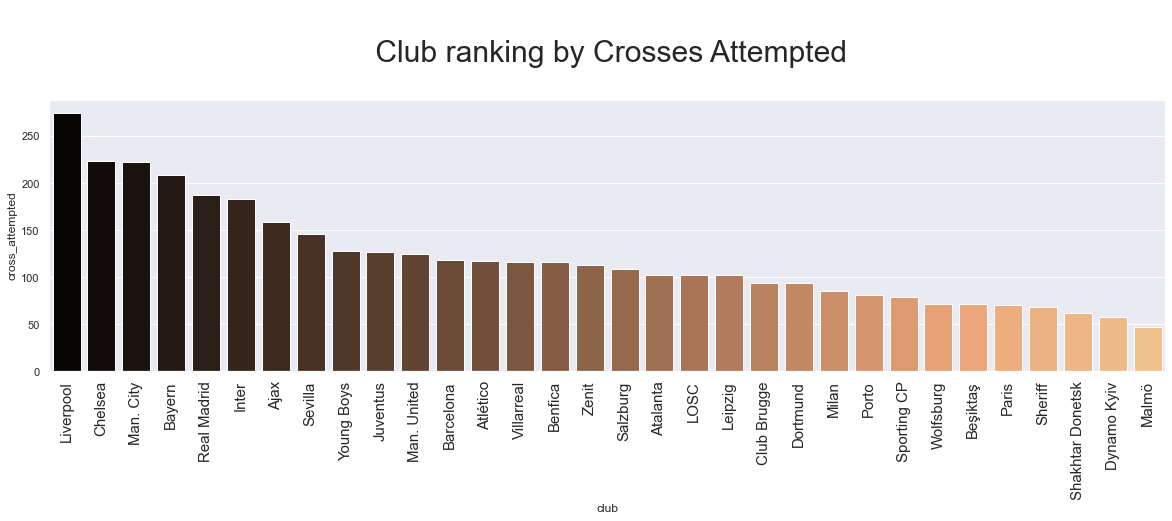

In [65]:
g1=g1.sort_values('cross_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="cross_attempted", data=g1,palette="copper",capsize=2)
p.axes.set_title("\n Club ranking by Crosses Attempted\n",fontsize=30)

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\piai\Anaconda3\lib\site-package

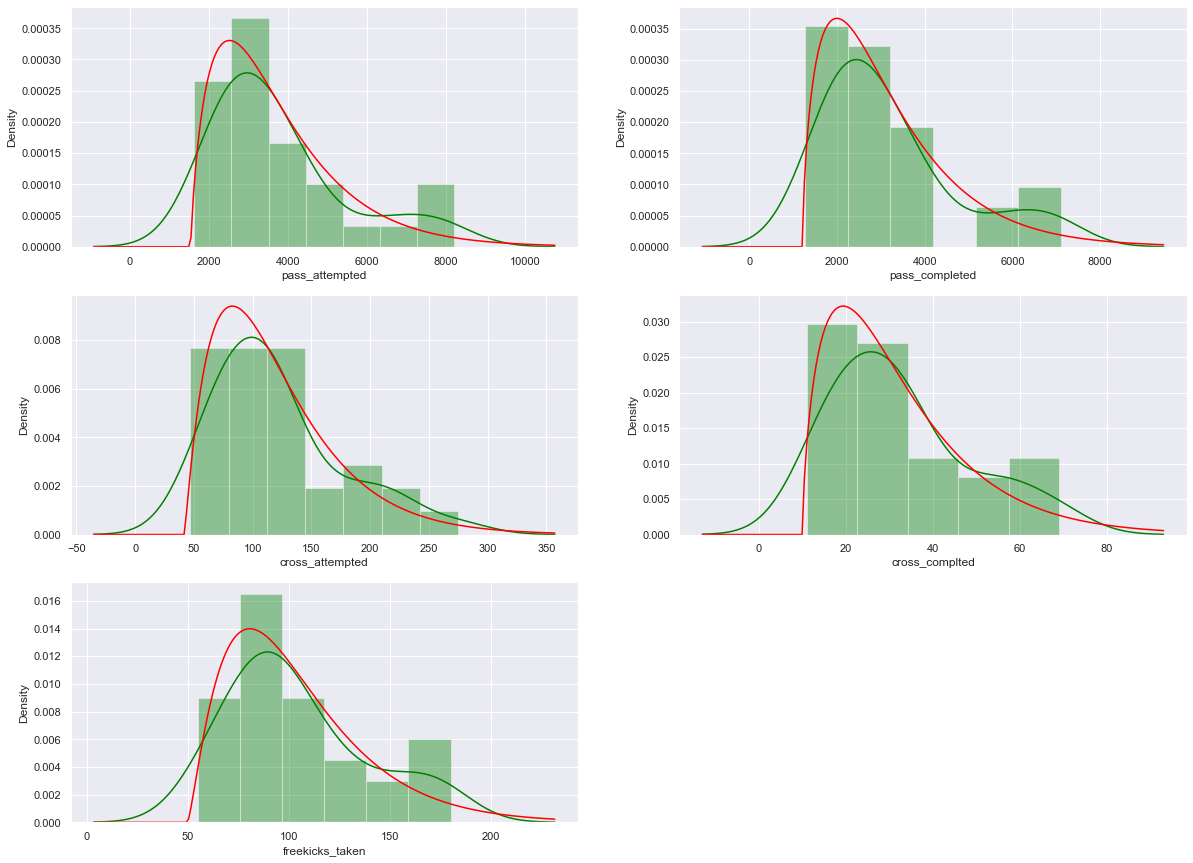

In [66]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["pass_attempted", "pass_completed", "cross_attempted", "cross_complted", "freekicks_taken"], 1):
    plt.subplot(3, 2, i)
    p = sns.distplot(g1[column], color='green', fit_kws={'color':'red'}, fit=stats.gamma, label='label 1')

In [67]:
g2 = dsp.groupby('club')['fouls_committed', 'fouls_suffered', 'red', 'yellow'].agg('sum').reset_index()

C:\Users\piai\AppData\Local\Temp\ipykernel_5420\647261084.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, '\n Club ranking by Fouls Committed\n')

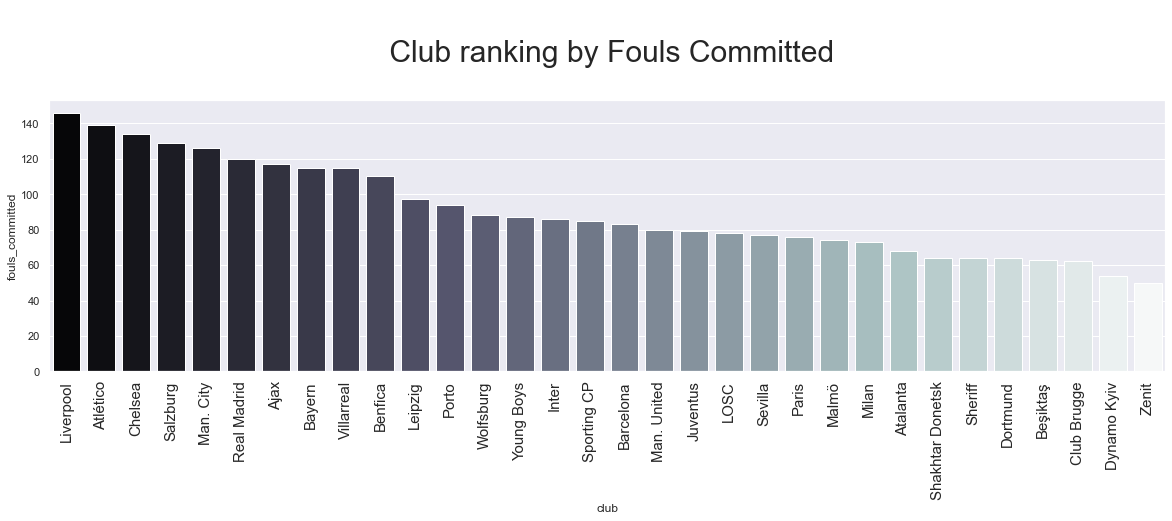

In [68]:
g2=g2.sort_values('fouls_committed',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="fouls_committed", data=g2,palette="bone",capsize=2)
p.axes.set_title("\n Club ranking by Fouls Committed\n",fontsize=30)

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



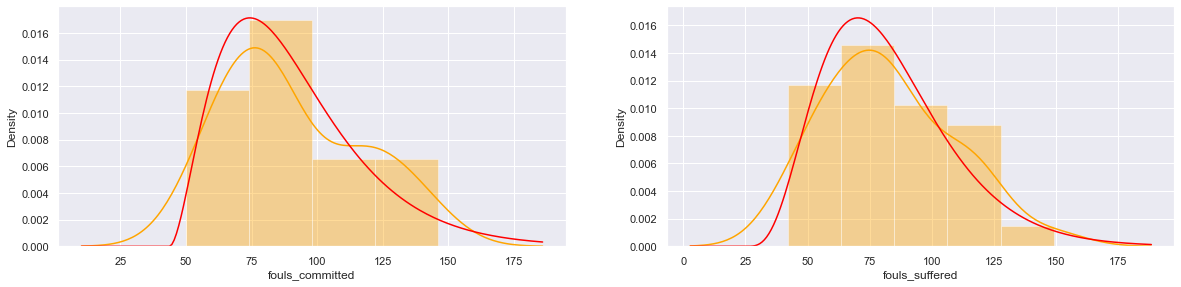

In [70]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(['fouls_committed', 'fouls_suffered'], 1):
    plt.subplot(3,2,i)
    p = sns.distplot(g2[column], color='orange', fit_kws={'color':'red'}, fit=stats.gamma, label='label 1')

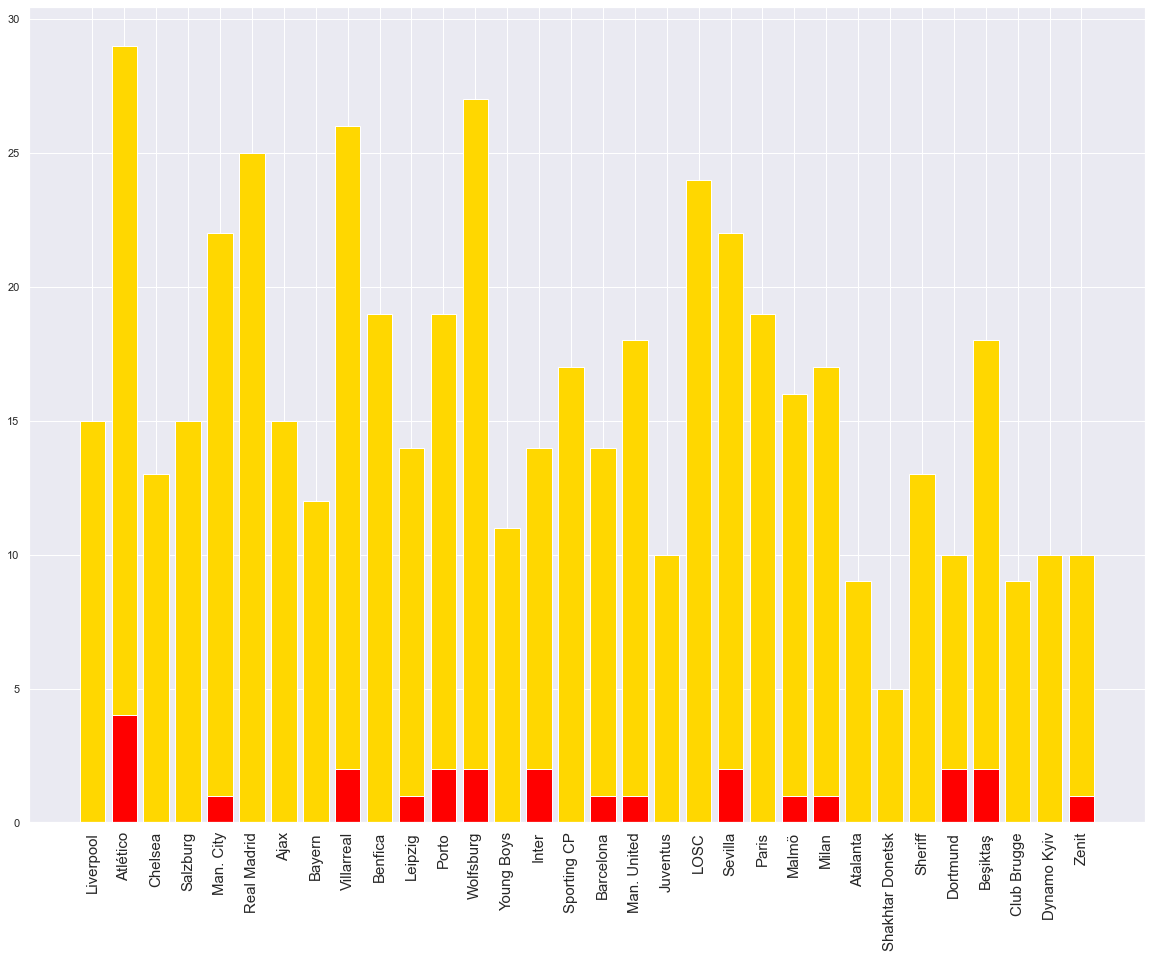

In [71]:
plt.xticks(fontsize=15,rotation='vertical')
plt.bar(g2['club'], g2["yellow"], color='red')
plt.bar(g2['club'], g2["red"], bottom=g2["yellow"], color='gold')
plt.show()

Text(0.5, 1.0, '\n Worst disiplined players \n')

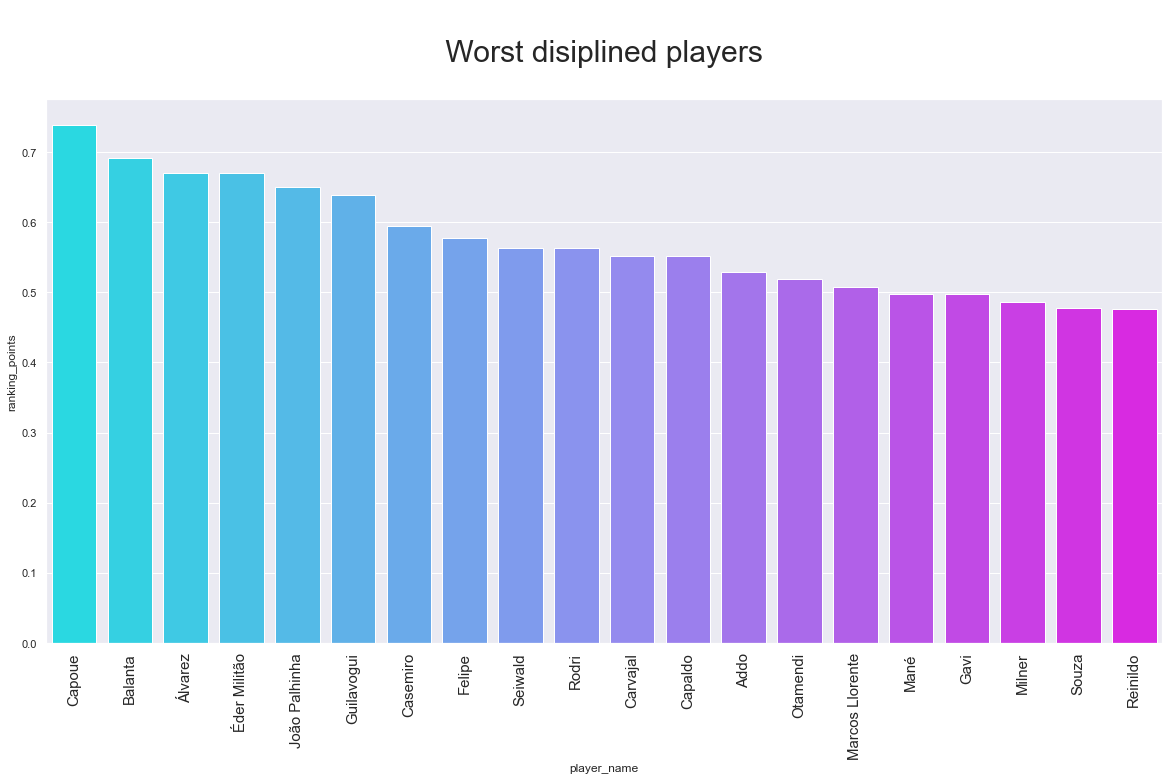

In [72]:
dsp['ranking_points']=(dsp['fouls_committed']/dsp['fouls_committed'].max())*0.5+(dsp['red']/dsp['red'].max())*0.3+(dsp['yellow']/dsp['yellow'].max())*0.2
sns.set(rc={'figure.figsize':(20,10)})
dfnx=dsp.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="cool",capsize=2)
p.axes.set_title("\n Worst disiplined players \n",fontsize=30)